### Import stuff

In [11]:
import random
from src.read_data import DataReader
from src.classification import CommonClassification
from src.preprocessing import CommonPreprocessing

### Setup parameters

In [12]:
DATA_DIR = "../data"
TRAIN_TEST_SPLIT_RATIO = 0.25

### Create required objects

In [13]:
data_reader = DataReader(DATA_DIR)
common_classifier = CommonClassification()
common_preprocessing = CommonPreprocessing()

### Load all KEEL datasets from directory

In [14]:
keel_data = data_reader.read_keel_dat_directory()
print('Read KEEL Datasets: %s' % len(keel_data))

Read KEEL Datasets: 11


### Select random KEEL dataset

Keel Dataset Info:
==> File Name: yeast-0-2-5-6_vs_3-7-8-9.dat
==> Size: 991
==> Features: 8
==> Classes: 2


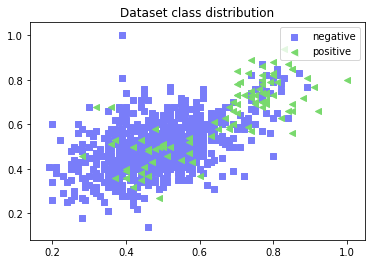

In [15]:
random_keel_data = random.choice(keel_data)
random_keel_data.print_info()
random_keel_data.plot_class_distribution()

### Convert KEEL data to testable collections

Keel Testable Dataset Info:
==> File Name: yeast-0-2-5-6_vs_3-7-8-9.dat
==> Size: 991
==> Features: 8
==> Classes: 2
==> Test-Train Split Ratio: 0.25
==> Train Size: 743
==> Test Size: 248


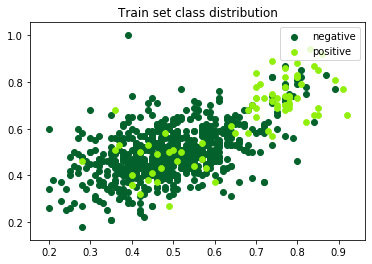

In [16]:
random_testable_keel_data = random_keel_data.as_testable(test_size=TRAIN_TEST_SPLIT_RATIO)
random_testable_keel_data.print_info()
random_testable_keel_data.plot_train_class_distribution()

### Sample data with Random Undersampling

Keel Testable Dataset Info:
==> File Name: yeast-0-2-5-6_vs_3-7-8-9.dat
==> Size: 198
==> Features: 8
==> Classes: 2
==> Test-Train Split Ratio: 0.2857142857142857
==> Train Size: 154
==> Test Size: 44


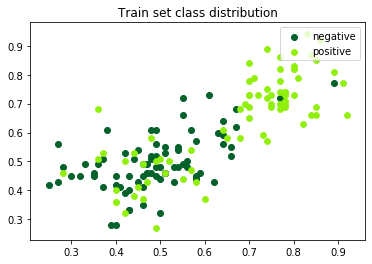

In [17]:
sampled_testable_keel_data = common_preprocessing.random_under_sampling(random_testable_keel_data)
sampled_testable_keel_data.print_info()
sampled_testable_keel_data.plot_train_class_distribution()

### Classify with Naive Bayes Gaussian Classifier

In [18]:
classification_result = common_classifier.naive_bayes_gaussian_classification(random_testable_keel_data)
classification_result.print_info()

Clasification Statistics:
==> File Name: yeast-0-2-5-6_vs_3-7-8-9.dat
==> Size: 991
==> Accuracy: 0.9435483870967742
==> Precision: 0.75
==> Confusion Matrix: [[222   4]
 [ 10  12]]
==> F1: 0.631578947368421
==> Recall: 0.5454545454545454


### Classify with Decision Tree Classifier

In [19]:
classification_result = common_classifier.decision_tree_classification(random_testable_keel_data)
classification_result.print_info()

Clasification Statistics:
==> File Name: yeast-0-2-5-6_vs_3-7-8-9.dat
==> Size: 991
==> Accuracy: 0.8669354838709677
==> Precision: 0.3333333333333333
==> Confusion Matrix: [[204  22]
 [ 11  11]]
==> F1: 0.4
==> Recall: 0.5


### Classify with Random Forest Classifier


In [20]:
classification_result = common_classifier.random_forest_classification(random_testable_keel_data)
classification_result.print_info()

Clasification Statistics:
==> File Name: yeast-0-2-5-6_vs_3-7-8-9.dat
==> Size: 991
==> Accuracy: 0.9395161290322581
==> Precision: 0.7058823529411765
==> Confusion Matrix: [[221   5]
 [ 10  12]]
==> F1: 0.6153846153846153
==> Recall: 0.5454545454545454
